In [1]:
import pandas as pd
import tabula
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_private_pel = pd.read_csv("private_resources_list.csv")
df_private_pel

,resource_name,resource_link,file_type,line
0,Entrada de passageiros por estação - Abril 2023,https://www.viaquatro.com.br/Media/ContentPage...,pdf,4
1,Entrada de passageiros por estação - Março 2023,https://www.viaquatro.com.br/Media/ContentPage...,pdf,4
2,Entrada de passageiros por estação - Fevereiro...,https://www.viaquatro.com.br/Media/ContentPage...,pdf,4
3,Entrada de passageiros por estação - Janeiro 2023,https://www.viaquatro.com.br/Media/ContentPage...,pdf,4
4,Entrada de passageiros por estação - Dezembro ...,https://www.viaquatro.com.br/Media/ContentPage...,pdf,4
...,...,...,...,...
385,Entrada de passageiros pelas linhas de bloquei...,https://www.viamobilidade.com.br/assets/viamob...,pdf,5
386,Passageiros transportados - Abril de 2023 Down...,https://www.viamobilidade.com.br/assets/viamob...,pdf,5
387,Passageiros transportados - Março de 2023 Down...,https://www.viamobilidade.com.br/assets/viamob...,pdf,5
388,Passageiros transportados - Fevereiro de 2023 ...,https://www.viamobilidade.com.br/assets/viamob...,pdf,5


In [3]:
links_l04_pel = df_private_pel.query(
    "resource_name.str.contains('Entrada de passageiros pelas linhas de bloqueio')"
     "& resource_name.str.contains('201[89]|202[0123]')"
     "& line == 4"
).reset_index(drop=True)
links_l04_pel

,resource_name,resource_link,file_type,line
0,Entrada de passageiros pelas linhas de bloquei...,https://www.viaquatro.com.br/Media/ContentPage...,pdf,4
1,Entrada de passageiros pelas linhas de bloquei...,https://www.viaquatro.com.br/Media/ContentPage...,pdf,4
2,Entrada de passageiros pelas linhas de bloquei...,https://www.viaquatro.com.br/Media/ContentPage...,pdf,4
3,Entrada de passageiros pelas linhas de bloquei...,https://www.viaquatro.com.br/Media/ContentPage...,pdf,4
4,Entrada de passageiros pelas linhas de bloquei...,https://www.viaquatro.com.br/Media/ContentPage...,pdf,4
...,...,...,...,...
59,Entrada de passageiros pelas linhas de bloquei...,https://www.viaquatro.com.br/Media/ContentPage...,pdf,4
60,Entrada de passageiros pelas linhas de bloquei...,https://www.viaquatro.com.br/Media/ContentPage...,pdf,4
61,Entrada de passageiros pelas linhas de bloquei...,https://www.viaquatro.com.br/Media/ContentPage...,pdf,4
62,Entrada de passageiros pelas linhas de bloquei...,https://www.viaquatro.com.br/Media/ContentPage...,pdf,4


In [4]:
# Mapping the months to its numeric equivalent
month_map = {
    'jan': 1, 'fev': 2, 'mar': 3, 'abr': 4,
    'mai': 5, 'jun': 6, 'jul': 7, 'ago': 8,
    'set': 9, 'out': 10, 'nov': 11, 'dez': 12
}

In [5]:
def l04_pel(url, date_raw):
    year = date_raw.split(" ")[-1]
    month = month_map[date_raw.split(" ")[0][:3].lower()]
    
    df_raw = tabula.read_pdf(url, pages="all")[0]
    df_raw["Linha 4 - Amarela"] = (
        df_raw["Linha 4 - Amarela"]
        .astype(str)
        .str.replace(".", "", regex=True)
        .str.replace(",", ".", regex=True)
    )
    df_raw["Linha 4 - Amarela"] = pd.to_numeric(df_raw["Linha 4 - Amarela"], errors="coerce") * 1000
    df_raw = df_raw.T[1:].rename(columns={0: "total", 1: "business_day_mean", 2: "saturday_mean", 3: "sunday_mean", 4: "max"})
    df_raw["date"] = pd.to_datetime(str(year) + str(month), format="%Y%m")
    df_raw["line"] = 4
    df_raw = df_raw[["date", "line", "total", "business_day_mean", "saturday_mean", "sunday_mean", "max"]].reset_index(drop=True)
    df_raw['total'] = pd.to_numeric(df_raw['total'], errors='coerce')
    df_raw['business_day_mean'] = pd.to_numeric(df_raw['business_day_mean'], errors='coerce')
    df_raw['saturday_mean'] = pd.to_numeric(df_raw['saturday_mean'], errors='coerce')
    df_raw['sunday_mean'] = pd.to_numeric(df_raw['sunday_mean'], errors='coerce')
    df_raw['max'] = pd.to_numeric(df_raw['max'], errors='coerce')
    
    return df_raw

In [6]:
results_l04_pel = []
for index, row in links_l04_pel.iterrows():
    resource_link = row["resource_link"]
    date_raw = row["resource_name"].split(" - ")[-1]
    df_processed = l04_pel(resource_link, date_raw)
    results_l04_pel.append(df_processed)

In [7]:
l04_pel_complete = pd.concat(results_l04_pel, ignore_index=True).sort_values("date")
l04_pel_complete

,date,line,total,business_day_mean,saturday_mean,sunday_mean,max
63,2018-01-01,4,3755000.0,1510000.0,780000.0,380000.0,1760000.0
62,2018-02-01,4,4585000.0,1650000.0,1470000.0,790000.0,2140000.0
61,2018-03-01,4,5308000.0,2160000.0,970000.0,570000.0,2280000.0
60,2018-04-01,4,5198000.0,2060000.0,1000000.0,540000.0,2270000.0
59,2018-05-01,4,563000.0,2260000.0,1130000.0,720000.0,2350000.0
...,...,...,...,...,...,...,...
4,2022-12-01,4,5018250.0,156790.0,83250.0,51740.0,207310.0
3,2023-01-01,4,4753900.0,150700.0,86730.0,56250.0,172930.0
2,2023-02-01,4,4961750.0,171040.0,115670.0,66260.0,192650.0
1,2023-03-01,4,6399570.0,198020.0,115690.0,64550.0,223080.0


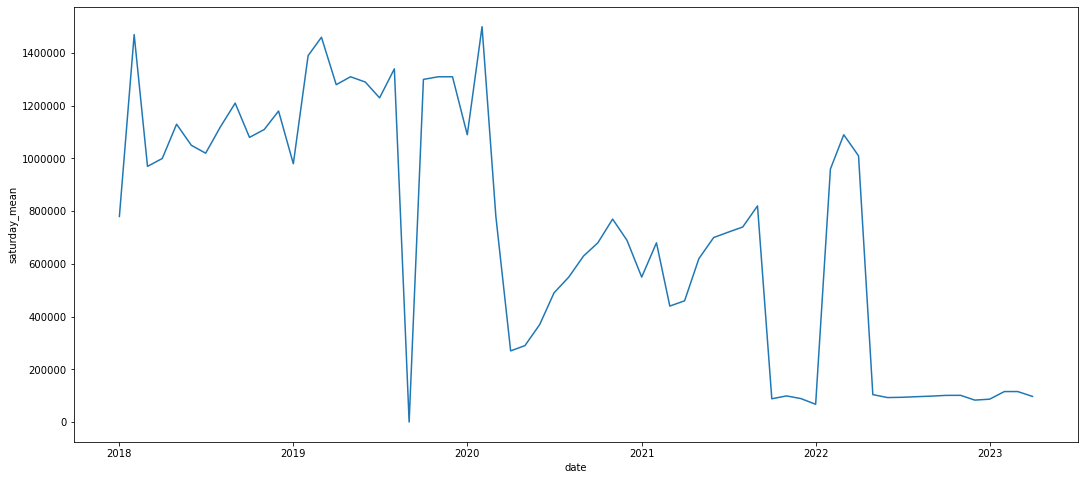

In [8]:
plt.figure(figsize=(18,8))
sns.lineplot(data=l04_pel_complete, x="date", y="saturday_mean")
plt.ticklabel_format(style="plain", axis="y")

In [9]:
l04_pel_complete.query(" date.dt.year == 2019")

,date,line,total,business_day_mean,saturday_mean,sunday_mean,max
51,2019-01-01,4,5094000.0,2050000.0,980000.0,630000.0,2310000.0
50,2019-02-01,4,6002000.0,2540000.0,1390000.0,920000.0,2710000.0
49,2019-03-01,4,6473000.0,2660000.0,1460000.0,880000.0,2810000.0
48,2019-04-01,4,6636000.0,2740000.0,1280000.0,740000.0,2820000.0
47,2019-05-01,4,7021000.0,2760000.0,1310000.0,840000.0,2950000.0
46,2019-06-01,4,6048000.0,2630000.0,1290000.0,810000.0,2800000.0
45,2019-07-01,4,6072000.0,2400000.0,1230000.0,720000.0,2570000.0
44,2019-08-01,4,7095000.0,2780000.0,1340000.0,740000.0,2910000.0
43,2019-09-01,4,NaN,52.0,57.0,132.0,46.0
42,2019-10-01,4,733000.0,2800000.0,1300000.0,910000.0,2910000.0


In [10]:
links_l04_pel["resource_link"].to_list()

['https://www.viaquatro.com.br/Media/ContentPage/Files/f92e718f098f46f987ffa55786053f6f_entrada-de-passageiros-pelas-linhas-de-bloqueio.pdf',
 'https://www.viaquatro.com.br/Media/ContentPage/Files/8331adb34ec34c1792fc61a966bd4d13_entrada-de-passageiros-pelas-linhas-de-bloqueio.pdf',
 'https://www.viaquatro.com.br/Media/ContentPage/Files/2eee94a2ecd040fba03a0c31684e1bc1_entrada-de-passageiros-pelas-linhas-de-bloqueio.pdf',
 'https://www.viaquatro.com.br/Media/ContentPage/Files/71bcfe3711e245a1bf55d553a8b64680_entrada-de-passageiros-pelas-linhas-de-bloqueio.pdf',
 'https://www.viaquatro.com.br/Media/ContentPage/Files/1324712d20424c88b460c956da6716f0_demanda-de-passageiros-vq-bloqueios-dezembro-2022.pdf',
 'https://www.viaquatro.com.br/Media/ContentPage/Files/6b706196bb174bf48cf6218ba89a5422_demanda-de-passageiros-viaquatro-bloqueios-novembro-2022.pdf',
 'https://www.viaquatro.com.br/Media/ContentPage/Files/f485c280ec2b4bdd9f5e6308fc7159de_entrada-de-passageiros-pelas-linhas-de-bloqueio.p

In [11]:
links_l05_pel = df_private_pel.query(
    "resource_name.str.contains('Entrada de passageiros pelas linhas de bloqueio')"
     "& resource_name.str.contains('201[89]|202[0123]')"
     "& line == 5"
).reset_index(drop=True)
links_l05_pel

,resource_name,resource_link,file_type,line
0,Entrada de passageiros pelas linhas de bloquei...,https://www.viamobilidade.com.br/assets/viamob...,pdf,5
1,Entrada de passageiros pelas linhas de bloquei...,https://www.viamobilidade.com.br/assets/viamob...,pdf,5
2,Entrada de passageiros pelas linhas de bloquei...,https://www.viamobilidade.com.br/assets/viamob...,pdf,5
3,Entrada de passageiros pelas linhas de bloquei...,https://www.viamobilidade.com.br/assets/viamob...,pdf,5
4,Entrada de passageiros pelas linhas de bloquei...,https://www.viamobilidade.com.br/assets/viamob...,pdf,5
5,Entrada de passageiros pelas linhas de bloquei...,https://www.viamobilidade.com.br/assets/viamob...,pdf,5
6,Entrada de passageiros pelas linhas de bloquei...,https://www.viamobilidade.com.br/assets/viamob...,pdf,5
7,Entrada de passageiros pelas linhas de bloquei...,https://www.viamobilidade.com.br/assets/viamob...,pdf,5
8,Entrada de passageiros pelas linhas de bloquei...,https://www.viamobilidade.com.br/assets/viamob...,pdf,5
9,Entrada de passageiros pelas linhas de bloquei...,https://www.viamobilidade.com.br/assets/viamob...,pdf,5


In [12]:
links_l05_pel["resource_link"].to_list()

['https://www.viamobilidade.com.br/assets/viamobilidade/ccr-viamobilidade/public/media/page/passengers/files/20211203111824056-Passageiros_bloqueio_Dez2018.pdf',
 'https://www.viamobilidade.com.br/assets/viamobilidade/ccr-viamobilidade/public/media/page/passengers/files/20211203111800982-Passageiros_bloqueio_Nov2018.pdf',
 'https://www.viamobilidade.com.br/assets/viamobilidade/ccr-viamobilidade/public/media/page/passengers/files/20211203111740582-Passageiros_bloqueio_Out2018.pdf',
 'https://www.viamobilidade.com.br/assets/viamobilidade/ccr-viamobilidade/public/media/page/passengers/files/20211203111722067-Passageiros_bloqueio_Set2018.pdf',
 'https://www.viamobilidade.com.br/assets/viamobilidade/ccr-viamobilidade/public/media/page/passengers/files/20220613152301376-08_Entrada de passageiros pelas linhas de bloqueio.pdf',
 'https://www.viamobilidade.com.br/assets/viamobilidade/ccr-viamobilidade/public/media/page/passengers/files/20211203111701278-Passageiros_bloqueio_Ago2018.pdf',
 'http

In [13]:
def l05_pel(url, date_raw):
    year = date_raw.split(" ")[2]
    month = month_map[date_raw.split(" ")[0][:3].lower()]
    df_raw = tabula.read_pdf(
        url,
        pages="all"
        )[0]
    df_raw["Linha 5 - Lilás"] = df_raw["Linha 5 - Lilás"].astype(str).str.replace(".", "", regex=True).str.replace(",", ".", regex=True)
    df_raw["Linha 5 - Lilás"] = pd.to_numeric(df_raw["Linha 5 - Lilás"], errors="coerce")*1000
    df_raw = df_raw.T[1:]
    df_raw.columns = ["total", "business_day_mean", "saturday_mean", "sunday_mean", "max"]
    df_raw["date"] = pd.to_datetime(str(year) + str(month), format="%Y%m")
    df_raw["line"] = 5
    df_raw = df_raw.reindex(columns=["date", "line", "total", "business_day_mean", "saturday_mean", "sunday_mean", "max"])
    df_raw.reset_index(drop=True, inplace=True)
    
    return df_raw

In [14]:
results_l05_pel = []
for index, row in links_l05_pel.iterrows():
    resource_link = row["resource_link"]
    date_raw = row["resource_name"].split(" - ")[-1]
    df_processed = l05_pel(resource_link, date_raw)
    results_l05_pel.append(df_processed)

In [15]:
l05_pel_complete = pd.concat(results_l05_pel, ignore_index=True).sort_values("date")
l05_pel_complete

,date,line,total,business_day_mean,saturday_mean,sunday_mean,max
4,2018-08-01,5,4136000,1780000,990000,460000,1870000
5,2018-08-01,5,4136000,1780000,990000,460000,1870000
3,2018-09-01,5,4489000,1920000,1030000,510000,2020000
2,2018-10-01,5,591000,2310000,1200000,660000,2630000
1,2018-11-01,5,6141000,2640000,1380000,770000,2860000
0,2018-12-01,5,6106000,2420000,1540000,870000,2880000
17,2019-01-01,5,70000,2790000,1560000,880000,3030000
16,2019-02-01,5,7623000,3260000,1810000,950000,3460000
15,2019-03-01,5,8122000,3390000,1840000,970000,3520000
14,2019-04-01,5,8659000,3530000,1860000,960000,3630000


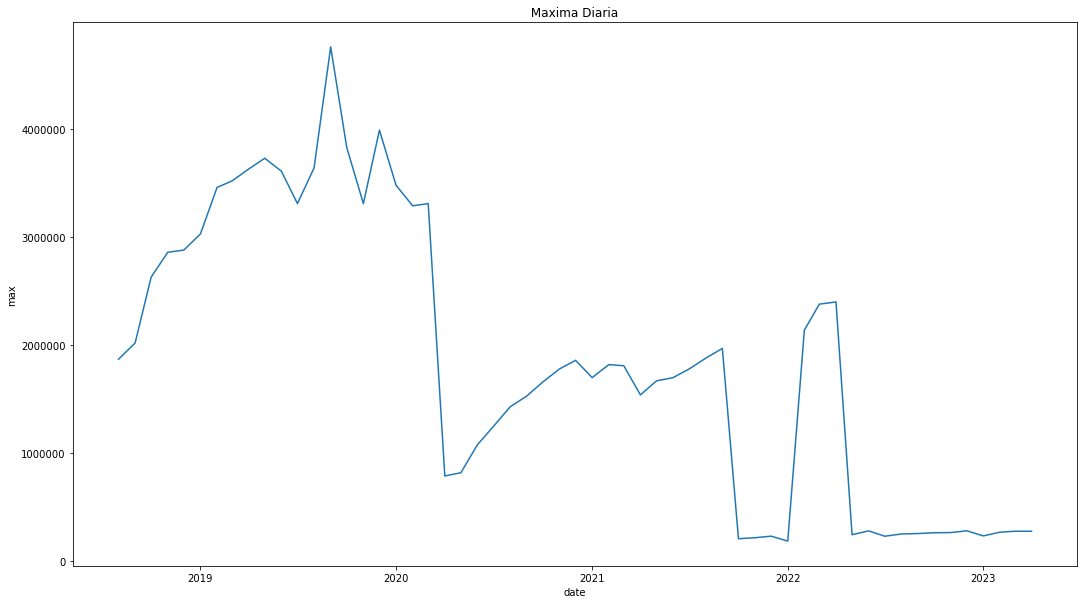

In [20]:
plt.figure(figsize=(18,10))
sns.lineplot(data=l05_pel_complete, x="date", y="max")
plt.title(" Maxima Diaria ")
plt.ticklabel_format(style="plain", axis="y");